<Body>   
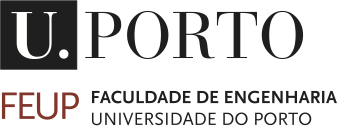   
<h1> <b>Computer Vision 2022/2023 </b> </h1>
<p><b>Andry Maykol Pinto </b> (amgp@fe.up.pt)</p>
<p>Department of Electrical and Computer Engineering</p>
</Body>  
FEUP

---

# Outlier detection and treatment

<h2>Table of contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>
    <li><a href="#ref1">Detecting outliers with boxplot</a></li>
    <li><a href="#ref2">Detecting outliers with Z-score</a></li>
    <li><a href="#ref3">Detecting outliers with Inter Quantile Range (IQR)</a></li>
    <li><a href="#ref4">Dealing with Outliers</a></li>
    <li><a href="#ref5">RANSAC estimator</a></li>
</ol>
<p></p>
</div>
<hr>


If our dataset is small, we can detect the outlier by just looking at the dataset. But what if we have a huge dataset? How do we identify the outliers then? We need to use visualization and mathematical techniques.

Below are some of the techniques of detecting outliers:

*   Boxplots;
*   Z-score;
*   Inter Quantile Range(IQR);



<a id="ref1"></a>
## Detecting outliers with boxplot

The Boxplot technique can be used to visualize and/or identify outliers in the data (which means, there is a great deviation from an element to a distribution?).

Consider that our inlier values are within 0 and 10. Let's generate 10 outlier values between 50 and 80, which represent the lower and upper limits.


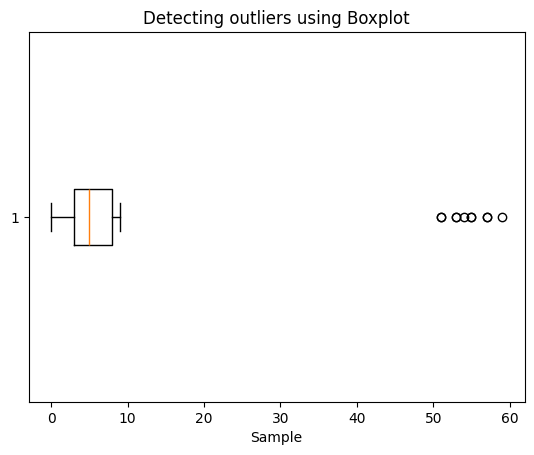

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# inlier
data = np.random.randint(0,10,200)
#outlier
outliers = np.random.randint(50,60,10)

# concatenate data, producing "sample"
samples = np.concatenate((data, outliers), axis=0)

#Plotting
plt.boxplot(samples, vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Sample');

As can be seen, if we have substancially more inliers than outliers, the boxplot can be used to model our samples (and to detect potential outliers).

<a id="ref2"></a>
## Detecting outliers with Z-score

With the sample provided, write a function capable of detecting outliers based on the Z-Score Statistical Method.


In [72]:
# Receives "data" and returns "outliers" according to Z-Score
def detect_outliers_zscore(data):
    outliers = []
    thres = 3                   #99.7% of the data points lie between +/- 3 standard deviation
    mean = np.mean(data)
    std = np.std(data)

    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers

sample_outliers = detect_outliers_zscore(samples)
print("Outliers from Z-scores method: ", sample_outliers)

Outliers from Z-scores method:  [54, 51, 55, 59, 57, 51, 53, 55, 57, 53]


------------------------------

**Exercise 1:**

Considering the following data, please calculate the outliers using a Z-score approach for N = 20 and N = 60.

Discuss the differences.

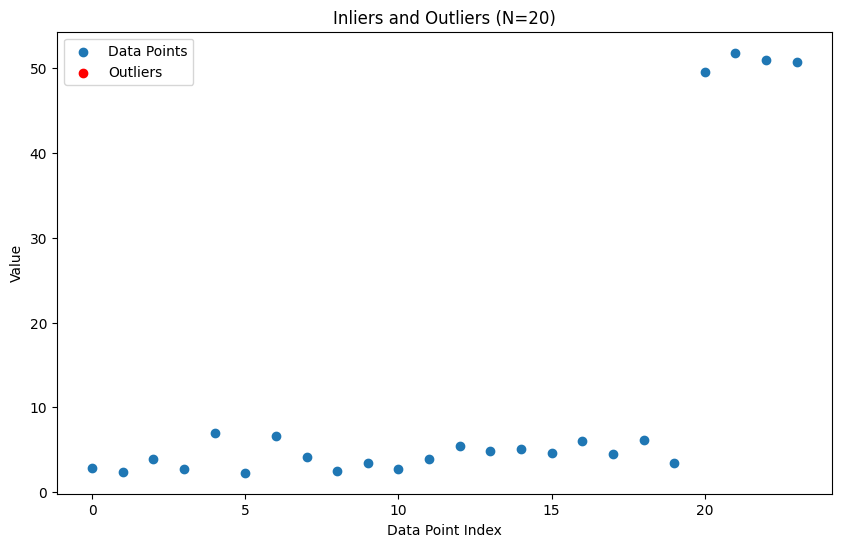

Outliers from Z-scores method (N=20):  []


In [73]:
# Case 1: N = 20
N = 20
samples_case1 = np.random.normal(5.0, 1.4, N)
samples_case1 = np.concatenate((samples_case1, np.random.normal(50.0, 1.4, 4)), axis=0)
outliers_case1 = detect_outliers_zscore(samples_case1)

# Plotting inliers and outliers for Case 1
plt.figure(figsize=(10, 6))
plt.scatter(range(len(samples_case1)), samples_case1, label='Data Points')
plt.scatter(
    [i for i, val in enumerate(samples_case1) if val in outliers_case1],
    outliers_case1,
    color='red',
    label='Outliers')
plt.title('Inliers and Outliers (N=20)')
plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.legend()
plt.show()
print("Outliers from Z-scores method (N=20): ", outliers_case1)

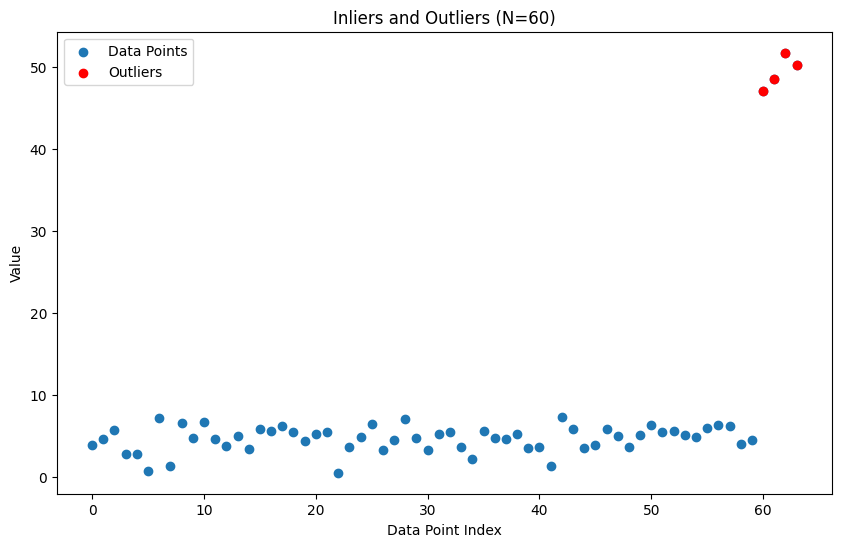

Outliers from Z-scores method (N=60):  [47.04705359172683, 48.46872514988206, 51.68630770682492, 50.15551272080863]


In [74]:
# Case 2: N = 60
N = 60
samples_case2 = np.random.normal(5.0, 1.4, N)
samples_case2 = np.concatenate((samples_case2, np.random.normal(50.0, 1.4, 4)), axis=0)
outliers_case2 = detect_outliers_zscore(samples_case2)

# Plotting inliers and outliers for Case 2
plt.figure(figsize=(10, 6))
plt.scatter(range(len(samples_case2)), samples_case2, label='Data Points')
plt.scatter(
    [i for i, val in enumerate(samples_case2) if val in outliers_case2],
    outliers_case2,
    color='red',
    label='Outliers')
plt.title('Inliers and Outliers (N=60)')
plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.legend()
plt.show()
print("Outliers from Z-scores method (N=60): ", outliers_case2)

<a id="ref3"></a>
## Detecting outliers with Inter Quantile Range (IQR)


**Exercise 2:**
With the sample provided, write a function capable of detecting outliers based on the Inter Quantile Range Statistical Method.

Note: see numpy `percentile`

In [75]:
def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    IQR = q3 - q1
    lwr_bound = q1 - 1.5 * IQR
    upr_bound = q3 + 1.5 * IQR

    for i in data:
        if (i < lwr_bound or i > upr_bound):
            outliers.append(i)
    return outliers

sample_outliers = detect_outliers_iqr(samples)
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [51, 51, 53, 53, 54, 55, 55, 57, 57, 59]


----------------------------------------------

<a id="ref4"></a>
# Dealing with Outliers

Until now, we learned about detecting outliers. There are some methods that can be used for dealing with outliers:

* Trimming/removing the outlier;
* Quantile based flooring and capping;
* Mean/Median imputation.

## Trimming

Deleting the outliers from the dataset

In [76]:
# Trimming

# Detect outliers using the IQR method
previous_sample = samples.copy()
sample_outliers = detect_outliers_iqr(samples)

# Remove each outlier from the sample
for outlier in sample_outliers:
    samples = np.delete(samples, np.where(samples == outlier)[0][0])

# Display the trimmed dataset and its length
print("Trimmed Samples:", samples)
print("Original Length:", len(previous_sample))
print("Trimmed Length:", len(samples))

Trimmed Samples: [9 6 5 7 8 8 9 2 8 6 6 9 1 6 8 8 3 2 3 6 3 6 5 7 0 8 4 6 5 8 2 3 9 7 5 3 4
 5 3 3 7 9 9 9 7 3 2 3 9 7 7 5 1 2 2 8 1 5 8 4 0 2 5 5 0 8 1 1 0 3 8 8 4 4
 0 9 3 7 3 2 1 1 2 1 4 2 5 5 5 2 5 7 7 6 1 6 7 2 3 1 9 5 9 9 2 0 9 1 9 0 6
 0 4 8 4 3 3 8 8 7 0 3 8 7 7 1 8 4 7 0 4 9 0 6 4 2 4 6 3 3 7 8 5 0 8 5 4 7
 4 1 3 3 9 2 5 2 3 5 7 2 7 1 6 5 0 0 3 1 9 9 6 6 7 8 8 7 0 8 6 8 9 8 3 6 1
 7 4 9 2 0 8 2 7 8 4 4 1 7 6 9]
Original Length: 210
Trimmed Length: 200


## Quantile based flooring and capping

Compute the 10th and 90th percentiles and replace each outlier by its respective percentile value.

In [80]:
# Computing 10th, 90th percentiles and replacing the outliers
samples = previous_sample
print(samples)

# 10 Percentile
tenth_percentile = np.percentile(samples, 10)
# 90 Percentile
ninetieth_percentile = np.percentile(samples, 90)
print("Tenth percentile:", tenth_percentile, "; Ninetieth percentile:", ninetieth_percentile, "; \n")

#The data points that are lesser than the 10th percentile are replaced with the 10th percentile value
b = np.where(samples<tenth_percentile, tenth_percentile, samples)
print("The < 10th percentile are replaced with the 10th percentile value: \n", b ,"\n")

#The data points that are greater than the 90th percentile are replaced with 90th percentile value
b = np.where(b>ninetieth_percentile, ninetieth_percentile, b)

print("The > 90th percentile are replaced with the 90th percentile value: \n", b ,"\n")

[ 9  6  5  7  8  8  9  2  8  6  6  9  1  6  8  8  3  2  3  6  3  6  5  7
  0  8  4  6  5  8  2  3  9  7  5  3  4  5  3  3  7  9  9  9  7  3  2  3
  9  7  7  5  1  2  2  8  1  5  8  4  0  2  5  5  0  8  1  1  0  3  8  8
  4  4  0  9  3  7  3  2  1  1  2  1  4  2  5  5  5  2  5  7  7  6  1  6
  7  2  3  1  9  5  9  9  2  0  9  1  9  0  6  0  4  8  4  3  3  8  8  7
  0  3  8  7  7  1  8  4  7  0  4  9  0  6  4  2  4  6  3  3  7  8  5  0
  8  5  4  7  4  1  3  3  9  2  5  2  3  5  7  2  7  1  6  5  0  0  3  1
  9  9  6  6  7  8  8  7  0  8  6  8  9  8  3  6  1  7  4  9  2  0  8  2
  7  8  4  4  1  7  6  9 54 51 55 59 57 51 53 55 57 53]
Tenth percentile: 1.0 ; Ninetieth percentile: 9.0 ; 

The < 10th percentile are replaced with the 10th percentile value: 
 [ 9.  6.  5.  7.  8.  8.  9.  2.  8.  6.  6.  9.  1.  6.  8.  8.  3.  2.
  3.  6.  3.  6.  5.  7.  1.  8.  4.  6.  5.  8.  2.  3.  9.  7.  5.  3.
  4.  5.  3.  3.  7.  9.  9.  9.  7.  3.  2.  3.  9.  7.  7.  5.  1.  2.
  2.  8.  1.  5.  

## Mean/Median imputation

Compute the median to replace the outliers using the median value.

Use the Boxplot technique to visualize the results.


Sample:  [ 9  6  5  7  8  8  9  2  8  6  6  9  1  6  8  8  3  2  3  6  3  6  5  7
  0  8  4  6  5  8  2  3  9  7  5  3  4  5  3  3  7  9  9  9  7  3  2  3
  9  7  7  5  1  2  2  8  1  5  8  4  0  2  5  5  0  8  1  1  0  3  8  8
  4  4  0  9  3  7  3  2  1  1  2  1  4  2  5  5  5  2  5  7  7  6  1  6
  7  2  3  1  9  5  9  9  2  0  9  1  9  0  6  0  4  8  4  3  3  8  8  7
  0  3  8  7  7  1  8  4  7  0  4  9  0  6  4  2  4  6  3  3  7  8  5  0
  8  5  4  7  4  1  3  3  9  2  5  2  3  5  7  2  7  1  6  5  0  0  3  1
  9  9  6  6  7  8  8  7  0  8  6  8  9  8  3  6  1  7  4  9  2  0  8  2
  7  8  4  4  1  7  6  9 54 51 55 59 57 51 53 55 57 53]
New array:  [9. 6. 5. 7. 8. 8. 9. 2. 8. 6. 6. 9. 1. 6. 8. 8. 3. 2. 3. 6. 3. 6. 5. 7.
 0. 8. 4. 6. 5. 8. 2. 3. 9. 7. 5. 3. 4. 5. 3. 3. 7. 9. 9. 9. 7. 3. 2. 3.
 9. 7. 7. 5. 1. 2. 2. 8. 1. 5. 8. 4. 0. 2. 5. 5. 0. 8. 1. 1. 0. 3. 8. 8.
 4. 4. 0. 9. 3. 7. 3. 2. 1. 1. 2. 1. 4. 2. 5. 5. 5. 2. 5. 7. 7. 6. 1. 6.
 7. 2. 3. 1. 9. 5. 9. 9. 2. 0. 9. 1. 9. 0. 6. 0

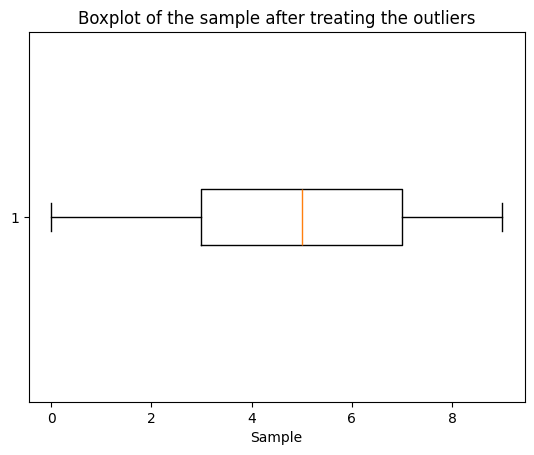

In [81]:
# Replace with median
print("Sample: ", samples)
median = np.median(samples)

for i in sample_outliers:
    samples = np.where(samples==i, median, samples)

print("New array: ",samples)
# print(x.dtype)

plt.boxplot(samples, vert=False)
plt.title("Boxplot of the sample after treating the outliers")
plt.xlabel("Sample");

<a id="ref5"></a>

## RANSAC estimator

RANSAC regression algorithm (see [link](http://www.cse.yorku.ca/~kosta/CompVis_Notes/ransac.pdf) ) is a well known technique for calculating a model based on inliers. Instead of taking care of outliers based on a statistical technique, the RANSAC is an iterative process that:
1.   Randomly selecting a subset of the data set
2.   Fitting a model to the selected subset
3.   Determining the number of outliers by calculating the fitting error of the sample (should be < error_threshold) to the model obtained in 2.
4.   Repeating steps 1-3 for a prescribed number of iterations.

----------------------
**Exercise 3**

Implement a function in Python of the RANSAC algorithm that estimates the inlier/outlier samples in a linear-regression problem problem (that uses the mean square error as a similarity measure). Your final result should be similar as the result of the RANSAC implementation in sklearn ([source](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ransac.html) )

Note: you can sort the residual error of each sample.



Estimated coefficients (true, linear regression, RANSAC):
82.1903908407869 [54.17236387] [82.08533159]


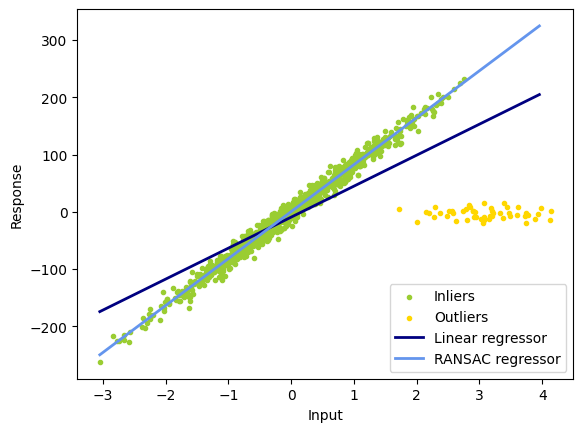

In [82]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model, datasets


n_samples = 1000
n_outliers = 50

# Simulate data
X, y, coef = datasets.make_regression(
    n_samples=n_samples,
    n_features=1,
    n_informative=1,
    noise=10,
    coef=True,
    random_state=0,
)
# Add outlier data
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

## Linear regression
# Fit line using all data
lr = linear_model.LinearRegression()
lr.fit(X, y)

# Robustly fit linear model with RANSAC algorithm
ransac = linear_model.RANSACRegressor()
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)



# Implement the RANSAC manually
# ...
# ...


## Comparing the results:

# Predict data of estimated models
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = lr.predict(line_X)
line_y_ransac = ransac.predict(line_X)

# Compare estimated coefficients
print("Estimated coefficients (true, linear regression, RANSAC):")
print(coef, lr.coef_, ransac.estimator_.coef_)

lw = 2
plt.scatter(
    X[inlier_mask], y[inlier_mask], color="yellowgreen", marker=".", label="Inliers"
)
plt.scatter(
    X[outlier_mask], y[outlier_mask], color="gold", marker=".", label="Outliers"
)
plt.plot(line_X, line_y, color="navy", linewidth=lw, label="Linear regressor")
plt.plot(
    line_X,
    line_y_ransac,
    color="cornflowerblue",
    linewidth=lw,
    label="RANSAC regressor",
)
plt.legend(loc="lower right")
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()

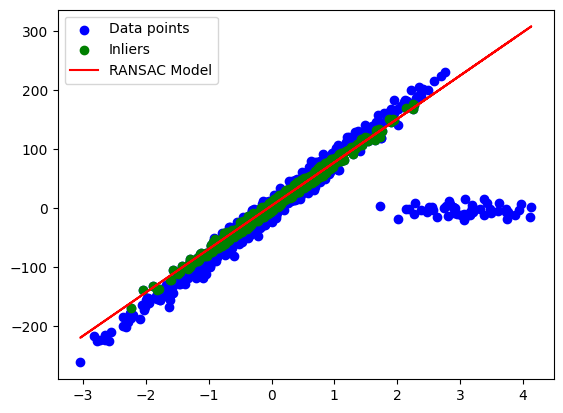

In [97]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import datasets
import matplotlib.pyplot as plt

def ransac(X, y, n_iter=100, threshold=10, min_inliers=0.5):
    n_samples = X.shape[0]
    best_model = None
    best_inliers = None
    best_error = float('inf')

    for _ in range(n_iter):
        # Randomly select 2 points (for linear regression)
        sample_indices = np.random.choice(n_samples, size=2, replace=False)
        X_sample = X[sample_indices]
        y_sample = y[sample_indices]

        # Fit the model using the sampled points
        model = LinearRegression()
        model.fit(X_sample, y_sample)

        # Compute residuals
        y_pred = model.predict(X)
        residuals = np.abs(y - y_pred)

        # Identify inliers based on the residuals
        inliers = residuals < threshold
        inlier_count = np.sum(inliers)

        # If enough inliers, evaluate the model
        if inlier_count / n_samples > min_inliers:
            inlier_model = model
            error = np.sum(residuals[inliers])  # Sum of residuals for inliers

            # If the current model is better, update the best model
            if error < best_error:
                best_model = inlier_model
                best_inliers = inliers
                best_error = error

    return best_model, best_inliers

# Example usage
n_samples = 1000
n_outliers = 50
X, y, coef = datasets.make_regression(n_samples=n_samples, n_features=1, n_informative=1, noise=10, coef=True, random_state=0)

# Add outliers
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

# Run RANSAC
model, inliers = ransac(X, y)

if model is not None:
    # Plot results
    plt.scatter(X, y, color='blue', label='Data points')
    plt.scatter(X[inliers], y[inliers], color='green', label='Inliers')
    plt.plot(X, model.predict(X), color='red', label='RANSAC Model')
    plt.legend()
    plt.show()
else:
    print("RANSAC did not find a valid model.")

---------------------------
